## Prostate158


In [2]:
! nvidia-smi

Fri Feb 24 22:17:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 455.45.01    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090    On   | 00000000:65:00.0 Off |                  N/A |
|  0%   44C    P8    27W / 420W |      3MiB / 24267MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
! ls

piccai_challenge


In [23]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [10]:
os.listdir('/input/prostate158_train/train/020/')

['t2.nii.gz',
 'adc.nii.gz',
 'dwi.nii.gz',
 't2_tumor_reader1.nii.gz',
 'adc_tumor_reader1.nii.gz',
 'adc_tumor_reader2.nii.gz',
 't2_anatomy_reader1.nii.gz']

In [40]:
img_path = '/input/prostate158_train/train/020/t2.nii.gz'
img = sitk.ReadImage(img_path)

In [41]:
arr = sitk.GetArrayFromImage(img)

In [34]:
for i in range(24):
    print(np.max(arr[i]))

0.0
0.0
0.0
0.0
0.0
3.0
3.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [35]:
arr.shape

(24, 270, 270)

In [36]:
from sklearn import preprocessing

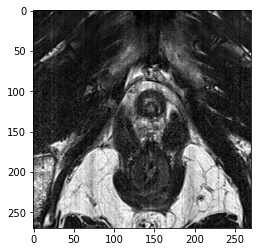

In [45]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 255))
plt.imshow(scaler.fit_transform(arr[4,:,:]), cmap='gray')

In [49]:
img_path2 = '/input/images/10005/10005_1000005_t2w.mha'
img = sitk.ReadImage(img_path2)
arr2 = sitk.GetArrayFromImage(img)
arr2.shape


(19, 384, 384)

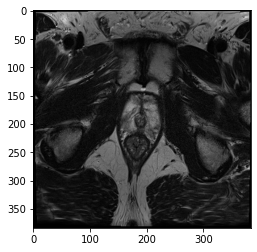

In [52]:
plt.imshow(arr2[4,:,:], cmap='gray')

In [64]:
prostate158_path = '/input/prostate158_train/train/'
os.listdir(prostate158_path)
for patient_id in os.listdir(prostate158_path):
    patient_path = prostate158_path + patient_id
    t2_path = patient_path + '/t2.nii.gz'
    t2 = sitk.ReadImage(t2_path)
    adc_path = patient_path + '/adc.nii.gz'
    adc = sitk.ReadImage(adc_path)
    dwi_path = patient_path + '/dwi.nii.gz'
    dwi = sitk.ReadImage(dwi_path)
    if not os.path.exists(f'/input/images/prostate158-{patient_id}'):
        os.mkdir(f'/input/images/prostate158-{patient_id}')
    sitk.WriteImage(t2, f'/input/images/prostate158-{patient_id}/prostate158-{patient_id}_{patient_id}_t2w.mha')
    sitk.WriteImage(adc, f'/input/images/prostate158-{patient_id}/prostate158-{patient_id}_{patient_id}_adc.mha')
    sitk.WriteImage(dwi, f'/input/images/prostate158-{patient_id}/prostate158-{patient_id}_{patient_id}_hbv.mha')
    if os.path.exists(patient_path + '/t2_tumor_reader1.nii.gz'):
        segmentation = sitk.ReadImage(patient_path + '/t2_tumor_reader1.nii.gz')
        sitk.WriteImage(segmentation, f'/input/picai_labels/csPCa_lesion_delineations/human_expert/resampled/prostate158-{patient_id}_{patient_id}.nii.gz')
    elif os.path.exists(patient_path + '/adc_tumor_reader1.nii.gz'):
        segmentation = sitk.ReadImage(patient_path + '/adc_tumor_reader1.nii.gz')
        sitk.WriteImage(segmentation, f'/input/picai_labels/csPCa_lesion_delineations/human_expert/resampled/prostate158-{patient_id}_{patient_id}.nii.gz')
    else:
        print(patient_id, ' no tiene tumor')
        segmentation = sitk.ReadImage(patient_path + '/empty.nii.gz')
        sitk.WriteImage(segmentation, f'/input/picai_labels/csPCa_lesion_delineations/human_expert/resampled/prostate158-{patient_id}_{patient_id}.nii.gz')


040  no tiene tumor
147  no tiene tumor
102  no tiene tumor
134  no tiene tumor
094  no tiene tumor
061  no tiene tumor
117  no tiene tumor
026  no tiene tumor
037  no tiene tumor
062  no tiene tumor
087  no tiene tumor
097  no tiene tumor
139  no tiene tumor
144  no tiene tumor
115  no tiene tumor
141  no tiene tumor
142  no tiene tumor
072  no tiene tumor
120  no tiene tumor
119  no tiene tumor
056  no tiene tumor
054  no tiene tumor
069  no tiene tumor
071  no tiene tumor
070  no tiene tumor
085  no tiene tumor
049  no tiene tumor
126  no tiene tumor
095  no tiene tumor
128  no tiene tumor
091  no tiene tumor
098  no tiene tumor
028  no tiene tumor
083  no tiene tumor
067  no tiene tumor
149  no tiene tumor
129  no tiene tumor
055  no tiene tumor
155  no tiene tumor
127  no tiene tumor
047  no tiene tumor
022  no tiene tumor
145  no tiene tumor
123  no tiene tumor
135  no tiene tumor
084  no tiene tumor
044  no tiene tumor
151  no tiene tumor
024  no tiene tumor
093  no tiene tumor


In [66]:
segmentation = sitk.ReadImage('/input/picai_labels/csPCa_lesion_delineations/human_expert/resampled/prostate158-034_034.nii.gz')

Image (0x55605e267ea0)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 1
  Modified Time: 350102
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 350076
  UpdateMTime: 350098
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [270, 270, 26]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [270, 270, 26]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [270, 270, 26]
  Spacing: [0.401786, 0.401786, 3]
  Origin: [1, -4.897e-12, 0]
  Direction: 
1 -4.897e-12 0
4.897e-12 1 0
0 0 1

  IndexToPointMatrix: 
0.401786 -1.96754e-12 0
1.96754e-12 0.401786 0
0 0 3

  PointToIndexMatrix: 
2.48889 1.21881e-11 0
-1.21881e-11 2.48889 0
0 0 0.333333

  Inverse Direction: 
1 4.897e-12 0
-4.897e-12 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x55605ecb5260)
  

In [68]:
test_msd = sitk.ReadImage('/input/Task05_Prostate/imagesTr/prostate_00.nii.gz')

In [70]:
test_arr = sitk.GetArrayFromImage(test_msd)
test_arr.shape

(2, 15, 320, 320)

In [71]:
from picai_baseline.splits.picai import train_splits

In [ ]:
import json
for fold, ds_config in train_splits.items():
    for patient_id in os.listdir(prostate158_path):
        subject = f'prostate158-{patient_id}_{patient_id}'
        ds_config['subject_list'].append(subject)
    print(f"Training fold {fold} has cases: {ds_config['subject_list']}")
    with open(f'./piccai_challenge/picai_baseline/src/picai_baseline/splits/picai_prostate158/ds-config-train-fold-{fold}.json', 'w') as file:
        json.dump(ds_config, file)




    

ModuleNotFoundError: No module named 'picai_baseline.splits.picai_prostate158'